# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from bpp.catalog import create_uniform_catalog
from bpp.psf import get_gaussian_psf
from bpp.cutouts import create_gaussian_cutouts

# Draw Scene

In [4]:
# get astropy catalog of galaxy parameters
cat = create_uniform_catalog(n_rows=9)

In [5]:
# create PSF galsim object
psf = get_gaussian_psf(fwhm=0.7)

In [6]:
# draw the scene
pixel_scale = 0.2
slen = 81
g1 = 0.0
g2 = 0.0
sky_level = 2.0
seed = 0
cutouts = create_gaussian_cutouts(slen=slen, catalog=cat, psf=psf, pixel_scale=pixel_scale, g1=g1, g2=g2, sky_level=sky_level, seed=seed)

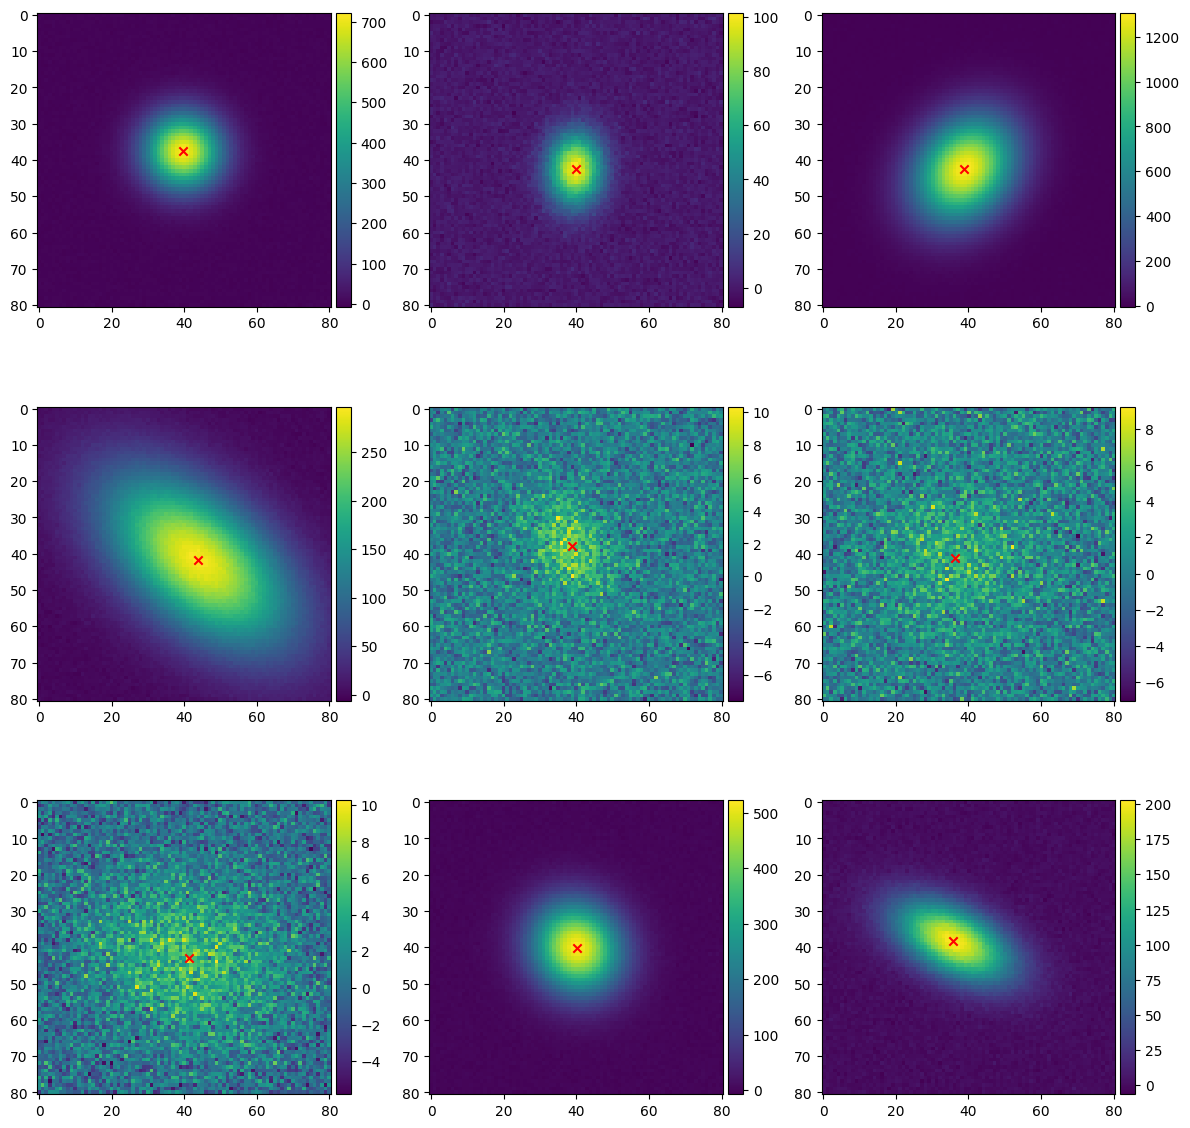

In [7]:
# let's look at some cutouts
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for ii, ax in enumerate(axes.flatten()):
    im = ax.imshow(cutouts[ii], interpolation=None)
    # with centers
    ax.scatter(cat['ra'][ii]/ pixel_scale  - 0.5 + slen/2, cat['dec'][ii] / pixel_scale - 0.5 + slen/2, marker='x', color='r')

    # colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
plt.tight_layout()


# Save dataset to h5py

In [8]:
from bpp.utils import write_data_to_hdf5_file, load_data_from_hdf5_file
import numpy as np
psf_image = psf.drawImage(scale=pixel_scale, nx=slen, ny=slen).array
data = {'image': cutouts, 'catalog': cat, 'psf_image':psf_image, 'g1':np.array([g1]), 'g2':np.array([g2]), 'pixel_scale':np.array([pixel_scale]), 'sky_level':np.array([sky_level]), 'seed':np.array([seed])}
# write to file
write_data_to_hdf5_file('demo.hdf5', data, overwrite=True)

In [9]:
# read from file
data = load_data_from_hdf5_file('demo.hdf5')

In [10]:
data['catalog']['flux']

array([247011.56396419,  23389.39282505, 774628.00324079, 462880.89914281,
         2575.05945418,   3504.06186306,   8658.18577538, 243608.05850913,
        96161.1217701 ])

In [11]:
data['image'].shape

(9, 81, 81)

In [12]:
data['g1'], data['g2']

(array([0.]), array([0.]))